In [39]:
from fastai.vision.all import * 
path = untar_data(URLs.PETS)/'images'

In [41]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [42]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.183657,0.021783,0.007442,08:00


epoch,train_loss,valid_loss,error_rate,time
0,0.066582,0.034567,0.012179,10:36
1,0.035462,0.012332,0.006089,10:52


In [45]:
import ipywidgets as widgets
from fastai.vision.all import PILImage


In [49]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value=(), description='Upload')

In [59]:
# Get the uploaded file data
uploaded_file = next(iter(uploader.value))
img_data = uploaded_file['content']

# Convert the memoryview data to bytes
img_bytes = bytes(img_data)

# Convert the byte data to an image
img = PILImage.create(img_bytes)

# Use the model to predict
is_cat, _, probs = learn.predict(img)

# Print the results
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
print(f"Probability it's a dog: {probs[0].item():.6f}")



Is this a cat?: False.
Probability it's a cat: 0.000034
Probability it's a dog: 0.999966


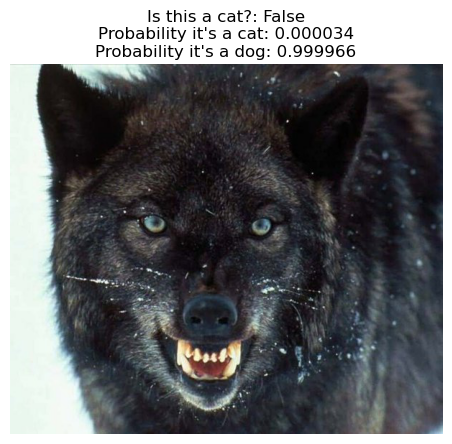

In [61]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.title(f"Is this a cat?: {is_cat}\nProbability it's a cat: {probs[1].item():.6f}\nProbability it's a dog: {probs[0].item():.6f}")
plt.show()
